In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


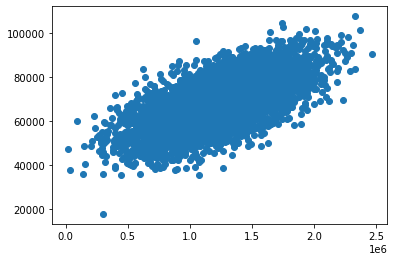

In [8]:
plt.scatter(df['Price'],df['Avg. Area Income'])

<AxesSubplot:xlabel='Price', ylabel='Avg. Area Income'>

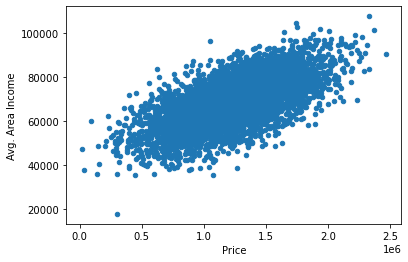

In [10]:
df.plot.scatter('Price','Avg. Area Income')

In [11]:
df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [12]:
df['Address'].nunique()

5000

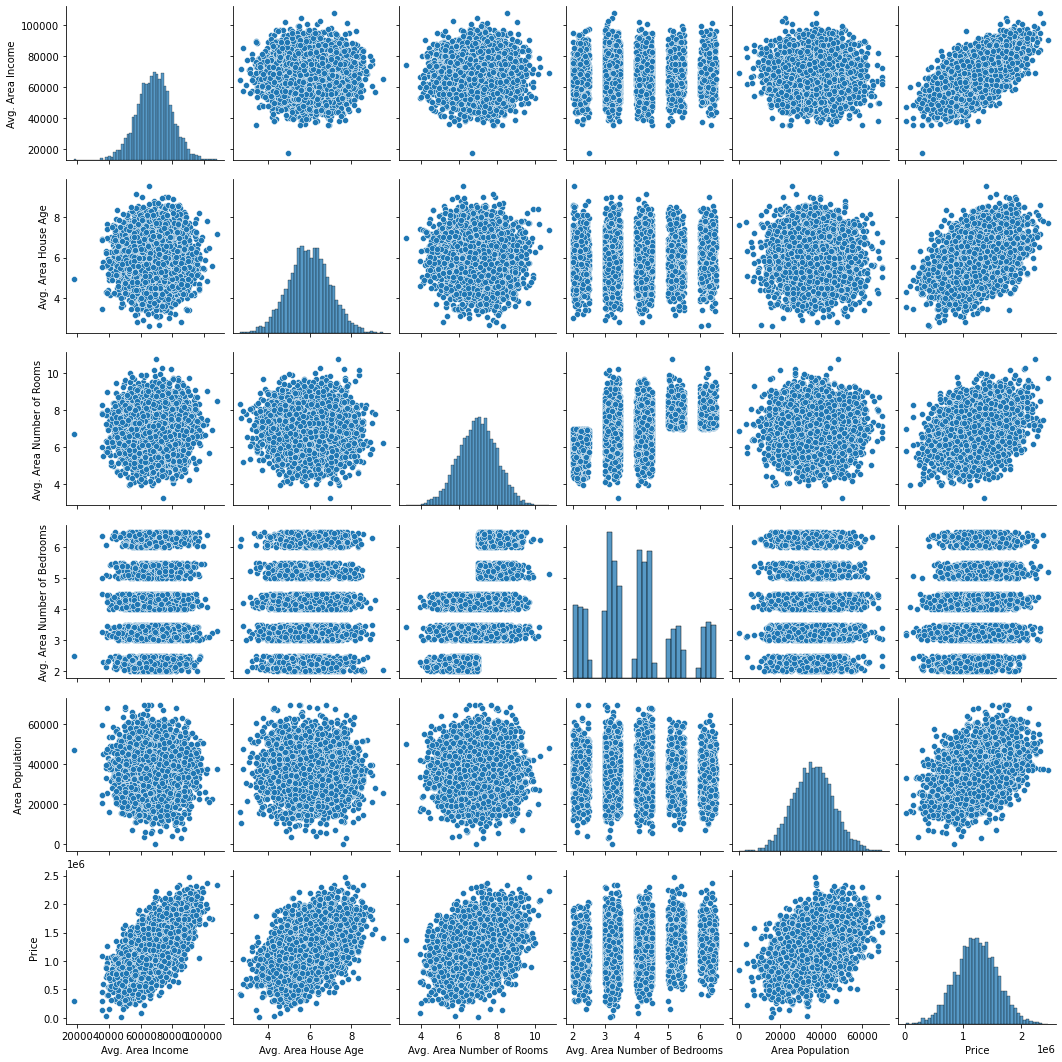

In [13]:
sns.pairplot(df)

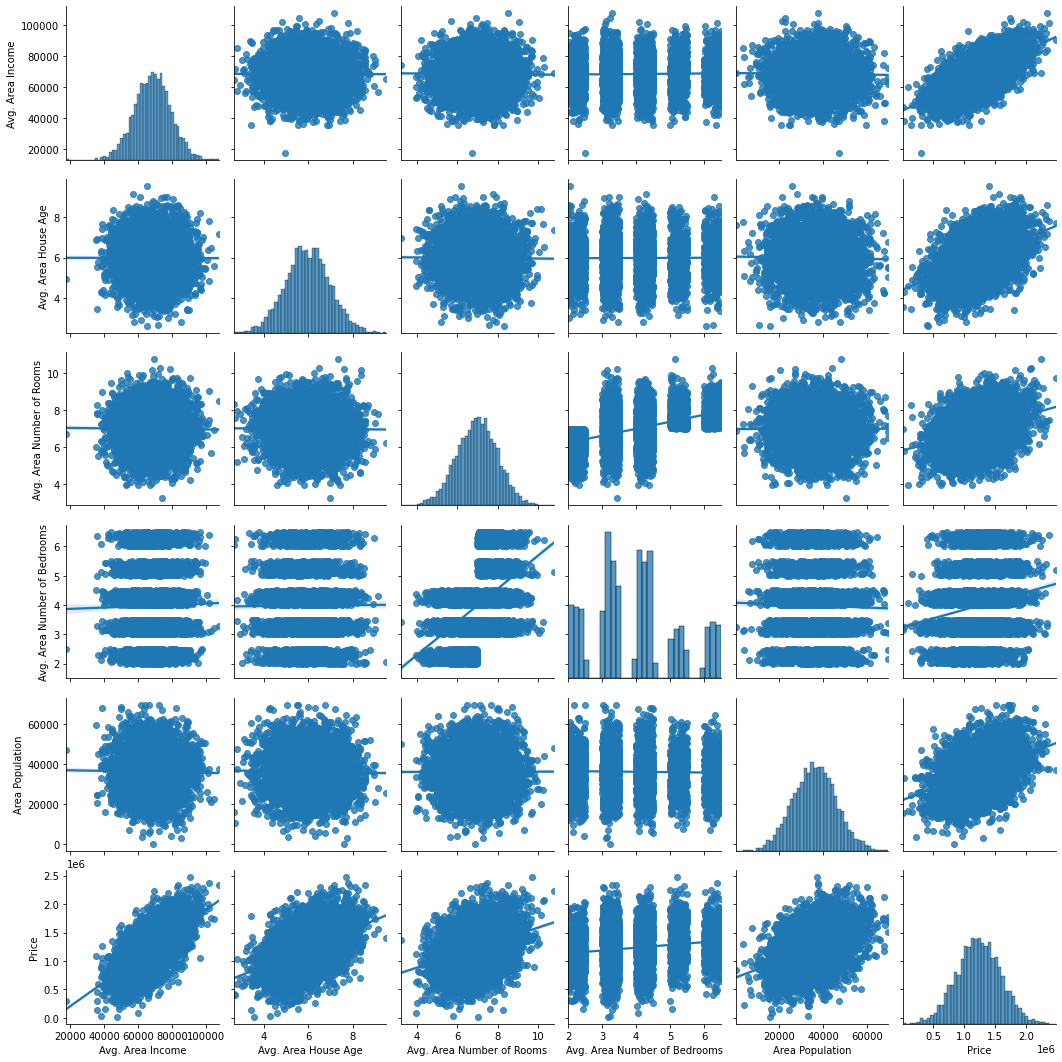

In [15]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

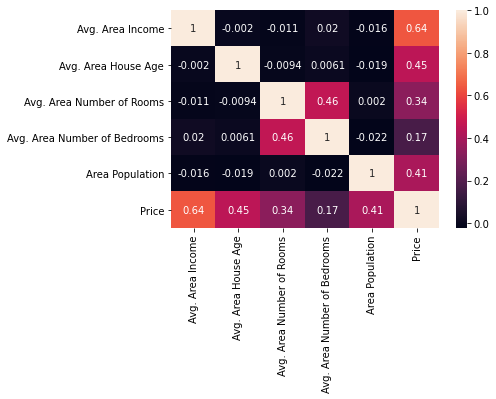

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [18]:
#Feature Matrix
x=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]

#Label Matrix
y=df['Price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression().fit(xtrain,ytrain)

In [25]:
model.coef_

array([2.16411925e+01, 1.64948656e+05, 1.22327933e+05, 1.52429772e+01])

In [26]:
coef = pd.DataFrame(model.coef_, columns=['Coeff'],index=x.columns)
coef

,Coeff
Avg. Area Income,21.641192
Avg. Area House Age,164948.655551
Avg. Area Number of Rooms,122327.933149
Area Population,15.242977


In [27]:
round(100*model.score(xtest,ytest),2)

91.71

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
ypred=model.predict(xtest)

In [30]:
xtest.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
1718,66774.99582,5.717143,7.795215,36788.98033
2511,62184.53937,4.925758,7.427689,26008.30912
345,73643.05730,6.766853,8.337085,43152.13958
2521,61909.04144,6.228343,6.593138,28953.92538
54,72942.70506,4.786222,7.319886,24377.90905


In [31]:
ypred[:5]

array([1258976.14453765,  819807.04053652, 1744036.82865368,
        971515.59810252,  991570.8489692 ])

In [33]:
ytest[:5].values

array([1251688.616 ,  873048.3196, 1696977.663 , 1063964.288 ,
        948788.2757])

In [34]:
print(mean_absolute_error(ytest,ypred))

81836.17793149386


In [35]:
print(mean_squared_error(ytest,ypred))

10365378637.968897


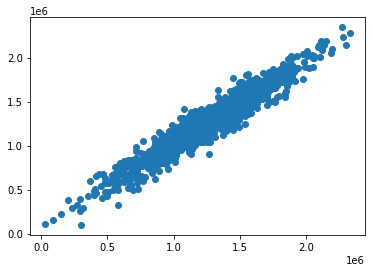

In [36]:
plt.scatter(ytest,ypred)